In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

In [2]:
# Import and organize data

In [3]:
f = open('miRBaseConverter_result.csv', 'r')
head = f.readline()
body = f.readlines()

In [4]:
f2 = open('miRNA10pluslist.csv', 'r')
body2 = f2.read()

In [5]:
plus10data = body2.split(',')
plus10data[-2] = 'MIMAT0017950'
plus10data = plus10data[0:-1]

In [6]:
newdict = {}

for item in body:
    line = item.strip('\n')
    line2 = line.split(',')
    
    newdict[line2[0].strip('"')] = line2[1].strip('"').strip('hsa-')

In [7]:
plus10dict = {}

for item in plus10data:
    plus10dict[item] = newdict[item]

In [8]:
miRlist = []
for item in newdict:
    miRlist += [newdict[item]]
    
len(miRlist)

2228

In [9]:
plus10miRlist = []
for item in plus10dict:
    plus10miRlist += [plus10dict[item]]

len(plus10miRlist)

1399

In [10]:
# all miRNA values
allmiRNA = pd.read_pickle('allmiRNA')

In [11]:
# only miRNA values w > 0.1 prevalence in train dataset
plus10miRNA = pd.read_pickle('10plusmiRNA')

In [12]:
#Y10 is threshold of >=10 equals high (1) TMB (59:227 high/low TMB split of train dataset)
#Y50 is threshold of >= 4.3 equals high (1) TMB (50:50 split of train dataset (143:143))

In [13]:
allData = allmiRNA.values

In [14]:
allX = allData[:, 2:-2]
allY10 = allData[:, -2]
allY50 = allData[:, -1]

In [15]:
plus10Data = plus10miRNA.values

In [16]:
plus10X = plus10Data[:, 2:-2]
plus10Y10 = plus10Data[:, -2]
plus10Y50 = plus10Data[:, -1]

In [17]:
# **TEST DATA**

In [18]:
TESTallmiRNA = pd.read_pickle('TEST_allmiRNA')

In [19]:
TESTplus10miRNA = pd.read_pickle('TEST_10plusmiRNA')

In [20]:
TEST_allData = TESTallmiRNA.values

In [21]:
TEST_allX = TEST_allData[:, 2:-2]
TEST_allY10 = TEST_allData[:, -2]
TEST_allY50 = TEST_allData[:, -1]

In [22]:
TEST_plus10Data = TESTplus10miRNA.values

In [23]:
TEST_plus10X = TEST_plus10Data[:, 2:-2]
TEST_plus10Y10 = TEST_plus10Data[:, -2]
TEST_plus10Y50 = TEST_plus10Data[:, -1]

In [24]:
modelallY10 = allY10.astype(int)
modelallY50 = allY50.astype(int)
modelplus10Y10 = plus10Y10.astype(int)
modelplus10Y50 = plus10Y50.astype(int)

In [25]:
# Model 1: allX, allY10

In [26]:
model1 = LogisticRegressionCV(cv = 5, scoring = 'roc_auc', n_jobs = -1, max_iter = 500, penalty = 'l2')

In [27]:
model1.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': 'roc_auc',
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [28]:
model1.fit(allX, modelallY10)

LogisticRegressionCV(cv=5, max_iter=500, n_jobs=-1, scoring='roc_auc')

In [29]:
roc_auc_score(allY10.astype(int), model1.predict_proba(allX)[:, 1])

0.8975584260434555

In [30]:
roc_auc_score(TEST_allY10.astype(int), model1.predict_proba(TEST_allX)[:, 1])

0.8564532520325202

In [31]:
plusnumList1 = []
for num in model1.coef_[0]:
    if num >= 0.01:
        plusnumList1 += [num]

In [32]:
negnumList1 = []
for num in model1.coef_[0]:
    if num <= -0.01:
        negnumList1 += [num]

In [33]:
model1df = pd.DataFrame(columns = miRlist)
model1df.loc[0] = model1.coef_[0].tolist()

In [34]:
m1plus01 = model1df.loc[0].nlargest(14)

m1plus01

miR-105-5p     0.029170
miR-196b-5p    0.027109
miR-767-5p     0.024431
miR-31-5p      0.021144
miR-675-3p     0.017897
miR-31-3p      0.014741
miR-372-3p     0.013359
miR-7702       0.012322
miR-137-3p     0.011659
miR-210-3p     0.011481
miR-2355-5p    0.011381
miR-767-3p     0.010539
miR-519a-5p    0.010402
miR-744-3p     0.010016
Name: 0, dtype: float64

In [35]:
m1plus01list = []
for name in m1plus01.index:
    m1plus01list += [name]

In [36]:
m1minus01 = model1df.loc[0].nsmallest(20)

m1minus01

miR-508-3p    -0.025452
miR-509-3p    -0.022833
miR-514a-3p   -0.021810
miR-187-3p    -0.021076
miR-552-5p    -0.020865
miR-552-3p    -0.019756
miR-135b-5p   -0.018369
miR-205-5p    -0.017603
miR-582-3p    -0.014427
miR-196a-5p   -0.013018
miR-582-5p    -0.012341
miR-508-5p    -0.011812
miR-486-5p    -0.011674
miR-192-5p    -0.011442
miR-451       -0.010955
miR-194-5p    -0.010840
miR-891a-5p   -0.010574
miR-1-3p      -0.010354
miR-664a-3p   -0.010340
let-7c-5p     -0.010194
Name: 0, dtype: float64

In [37]:
m1minus01list = []
for name in m1minus01.index:
    m1minus01list += [name]

In [38]:
# Confusion matrices w different thresholds

In [39]:
# 0.5 threshold
confusion_matrix(TEST_allY10.astype(int), model1.predict(TEST_allX))

array([[123,   0],
       [ 31,   1]])

In [40]:
# 0.4 threshold
y_pred1_4 = (model1.predict_proba(TEST_allX)[:, 1] > 0.4).astype('float')
confusion_matrix(TEST_allY10.astype(int), y_pred1_4)

array([[122,   1],
       [ 27,   5]])

In [41]:
# 0.3 threshold
y_pred1_3 = (model1.predict_proba(TEST_allX)[:, 1] > 0.3).astype('float')
confusion_matrix(TEST_allY10.astype(int), y_pred1_3)

array([[117,   6],
       [ 16,  16]])

In [42]:
# 0.25 threshold
y_pred1_25 = (model1.predict_proba(TEST_allX)[:, 1] > 0.25).astype('float')
confusion_matrix(TEST_allY10.astype(int), y_pred1_25)

array([[108,  15],
       [ 12,  20]])

In [43]:
# 0.2 threshold
y_pred1_2 = (model1.predict_proba(TEST_allX)[:, 1] > 0.2).astype('float')
confusion_matrix(TEST_allY10.astype(int), y_pred1_2)

array([[93, 30],
       [ 5, 27]])

In [44]:
# 0.15 threshold
y_pred1_15 = (model1.predict_proba(TEST_allX)[:, 1] > 0.15).astype('float')
confusion_matrix(TEST_allY10.astype(int), y_pred1_15)

array([[57, 66],
       [ 3, 29]])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


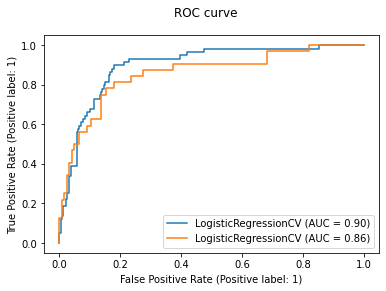

In [45]:
train1_disp = plot_roc_curve(model1, allX, allY10.astype(int))
test1_disp = plot_roc_curve(model1, TEST_allX, TEST_allY10.astype(int), ax = train1_disp.ax_)
test1_disp.figure_.suptitle('ROC curve')

plt.show()

In [46]:
# Bootstrapping

In [47]:
y_pred1 = model1.predict_proba(TEST_allX)[:, 1]
y_true1 = TEST_allY10.astype(int)

In [48]:
n_bootstraps = 1000
rng_seed = 5
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    indices = rng.randint(0, len(y_pred1), len(y_pred1))
    if len(np.unique(y_true1[indices])) < 2:
        continue
    
    score = roc_auc_score(y_true1[indices], y_pred1[indices])
    bootstrapped_scores.append(score)

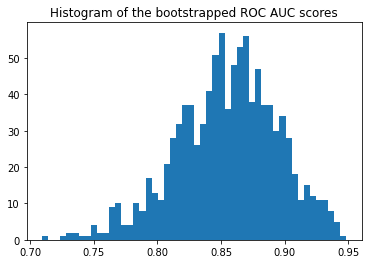

In [49]:
import matplotlib.pyplot as plt
plt.hist(bootstrapped_scores, bins=50)
plt.title('Histogram of the bootstrapped ROC AUC scores')
plt.show()

In [50]:
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Confidence interval for the score: [0.784 - 0.919]


In [51]:
std_dev1 = np.std(sorted_scores)
std_dev1

0.039998451782447646

In [52]:
np.mean(sorted_scores)

0.8549862921329776

In [53]:
np.max(sorted_scores)

0.9484247967479675

In [54]:
np.min(sorted_scores)

0.7094861660079052

In [55]:
# Calibration curve

In [56]:
prob_true, prob_pred = calibration_curve(y_true1, y_pred1, n_bins = 20)

In [57]:
prob_true

array([0.        , 0.07317073, 0.05263158, 0.31818182, 0.30769231,
       0.66666667, 0.75      , 0.8       , 1.        ])

In [58]:
prob_pred

array([0.08115995, 0.12490835, 0.17494111, 0.22231696, 0.26588461,
       0.32277863, 0.36746391, 0.42136263, 0.777589  ])

In [59]:
cal_clf1 = CalibratedClassifierCV(base_estimator = model1, cv = 'prefit')

In [60]:
cal_clf1.fit(TEST_allX, TEST_allY10.astype(int))

CalibratedClassifierCV(base_estimator=LogisticRegressionCV(cv=5, max_iter=500,
                                                           n_jobs=-1,
                                                           scoring='roc_auc'),
                       cv='prefit')

In [61]:
cal_clf1.score(TEST_allX, TEST_allY10.astype(int))

0.8580645161290322

In [62]:
confusion_matrix(TEST_allY10.astype(int), cal_clf1.predict(TEST_allX))

array([[117,   6],
       [ 16,  16]])

In [63]:
# Model 2: plus10X, plus10Y10 (only using miRNAs with prominence > 0.1)

In [64]:
model2 = LogisticRegressionCV(cv = 5, scoring = 'roc_auc', n_jobs = -1, max_iter = 500, penalty = 'l2')

In [65]:
model2.fit(plus10X, modelplus10Y10)

LogisticRegressionCV(cv=5, max_iter=500, n_jobs=-1, scoring='roc_auc')

In [66]:
model2df = pd.DataFrame(columns = plus10miRlist)

In [67]:
model2df.loc[0] = model2.coef_[0].tolist()

In [68]:
m2plus01 = model2df.loc[0].nlargest(14)
m2plus01

miR-105-5p     0.029266
miR-196b-5p    0.027182
miR-767-5p     0.024520
miR-31-5p      0.021094
miR-675-3p     0.017992
miR-31-3p      0.014695
miR-372-3p     0.013566
miR-7702       0.012367
miR-137-3p     0.011665
miR-210-3p     0.011570
miR-2355-5p    0.011431
miR-767-3p     0.010576
miR-519a-5p    0.010552
miR-744-3p     0.010009
Name: 0, dtype: float64

In [69]:
m2plus01list = []
for name in m2plus01.index:
    m2plus01list += [name]

In [70]:
m2minus01 = model2df.loc[0].nsmallest(20)
m2minus01

miR-508-3p    -0.025469
miR-509-3p    -0.022838
miR-514a-3p   -0.021808
miR-187-3p    -0.021116
miR-552-5p    -0.020879
miR-552-3p    -0.019765
miR-135b-5p   -0.018370
miR-205-5p    -0.017608
miR-582-3p    -0.014379
miR-196a-5p   -0.012935
miR-582-5p    -0.012337
miR-508-5p    -0.011814
miR-486-5p    -0.011650
miR-192-5p    -0.011350
miR-451       -0.010907
miR-194-5p    -0.010752
miR-891a-5p   -0.010589
miR-1-3p      -0.010369
miR-664a-3p   -0.010334
let-7c-5p     -0.010109
Name: 0, dtype: float64

In [71]:
m2minus01list = []
for name in m2minus01.index:
    m2minus01list += [name]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


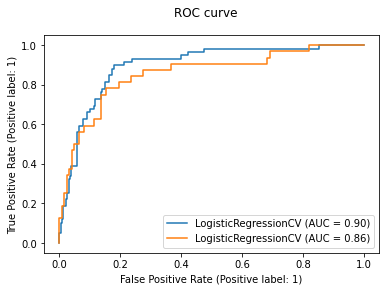

In [72]:
train2_disp = plot_roc_curve(model2, plus10X, plus10Y10.astype(int))
test2_disp = plot_roc_curve(model2, TEST_plus10X, TEST_plus10Y10.astype(int), ax = train2_disp.ax_)
test2_disp.figure_.suptitle('ROC curve')

plt.show()

In [73]:
# Bootstrapping

In [74]:
y_pred2 = model2.predict_proba(TEST_plus10X)[:, 1]
y_true2 = TEST_allY10.astype(int)

In [75]:
n_bootstraps = 1000
rng_seed = 6
bootstrapped_scores2 = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    indices = rng.randint(0, len(y_pred2), len(y_pred2))
    if len(np.unique(y_true2[indices])) < 2:
        continue
    
    score = roc_auc_score(y_true2[indices], y_pred2[indices])
    bootstrapped_scores2.append(score)

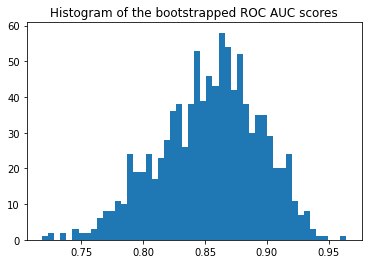

In [76]:
import matplotlib.pyplot as plt
plt.hist(bootstrapped_scores2, bins=50)
plt.title('Histogram of the bootstrapped ROC AUC scores')
plt.show()

In [77]:
sorted_scores2 = np.array(bootstrapped_scores2)
sorted_scores2.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower2 = sorted_scores2[int(0.05 * len(sorted_scores2))]
confidence_upper2 = sorted_scores2[int(0.95 * len(sorted_scores2))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower2, confidence_upper2))

Confidence interval for the score: [0.783 - 0.916]


In [78]:
# Model 3: allX, allY50 (50:50 split of high/low TMB in train set (4.3 threshold for H/L))

In [79]:
model3 = LogisticRegressionCV(cv = 5, scoring = 'roc_auc', n_jobs = -1, max_iter = 500, penalty = 'l2')

In [80]:
model3.fit(allX, modelallY50)

LogisticRegressionCV(cv=5, max_iter=500, n_jobs=-1, scoring='roc_auc')

In [81]:
roc_auc_score(allY50.astype(int), model3.predict_proba(allX)[:, 1])

0.9648882585945524

In [82]:
roc_auc_score(TEST_allY50.astype(int), model3.predict_proba(TEST_allX)[:, 1])

0.7985299031072502

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


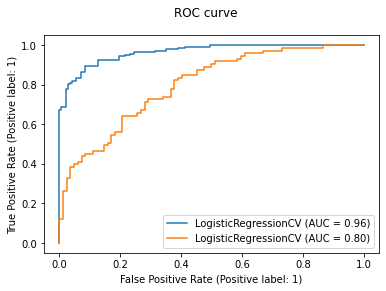

In [83]:
train3_disp = plot_roc_curve(model3, allX, allY50.astype(int))
test3_disp = plot_roc_curve(model3, TEST_allX, TEST_allY50.astype(int), ax = train3_disp.ax_)
test3_disp.figure_.suptitle('ROC curve')

plt.show()

In [84]:
# Model 4: plus10X, plus10Y50

In [85]:
model4 = LogisticRegressionCV(cv = 5, scoring = 'roc_auc', n_jobs = -1, max_iter = 500, penalty = 'l2')

In [86]:
model4.fit(plus10X, modelplus10Y50)

LogisticRegressionCV(cv=5, max_iter=500, n_jobs=-1, scoring='roc_auc')

In [87]:
roc_auc_score(plus10Y50.astype(int), model4.predict_proba(plus10X)[:, 1])

0.963616802777642

In [88]:
roc_auc_score(TEST_plus10Y50.astype(int), model4.predict_proba(TEST_plus10X)[:, 1])

0.7973605078516539

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


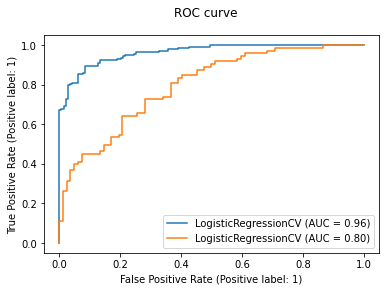

In [89]:
train4_disp = plot_roc_curve(model4, plus10X, plus10Y50.astype(int))
test4_disp = plot_roc_curve(model4, TEST_plus10X, TEST_plus10Y50.astype(int), ax = train4_disp.ax_)
test4_disp.figure_.suptitle('ROC curve')

plt.show()